In [1]:
from SimuSamp.new_funcs.load.SpatDat import SpatDat
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from SimuSamp.new_funcs.compute.n_core_sampler import sample_n_cores
import pingouin as pg

In [2]:
parent_filepath = "../../../../Simulated WS Sampling/block_data"
sampleids = ["01_F", "01_G", "02_G", "02_H", "03_B", "03_H", "04_I", "04_N", "05_G", "05_I", "06_H", "07_K", "08_J", "09_E", "10_B", "11_E", "11_F", "12_M", "13_G", "14_I", "15_G", "16_B", "17_I", "18_E", "19_F", "21_I", "22_N", "23_B", "24_I", "25_M", "26_I", "27_H", "28_FSC", "29_L", "30_D"]
microns_per_pixel=0.22715
mm2_per_pixels2 = (microns_per_pixel / 1000) ** 2

In [21]:
# single iteration
simdata_list = []
for sampleid in ["01_F"]:
    
    spatdat = SpatDat(sampleid=sampleid, parent_filepath=parent_filepath)
    
    cells = spatdat.subset_cells("extended_partition")
    tum = spatdat.subset_annotation("tumour")
    ext_partition = spatdat.subset_annotation("extended_partition")
    im = spatdat.subset_annotation("IM")
    outer_im = spatdat.subset_annotation("outer_IM")

    for region_data in [(tum, "tumour", im), (im, "IM", tum)]:
        for r in [1.0]:
            for n in [3]:
                for i in range(1):
                    simdata = sample_n_cores(sampleid, cells, region_data[0], region=region_data[1], secondary_anno=region_data[2], outer_im_anno=outer_im, core_radius=r, n_cores=n, extended_partition=ext_partition, n_neighbours=True, plot=True)

                    simdata_list.append(simdata)

sim_data = pd.DataFrame(simdata_list)

In [22]:
sim_data

,Density_n_mean,Den_stdev,Den_sterr,Region,Sampleid,Radius,n_cores,Cores_actually_sampled,Counts_n_mean,Areas_n_mean,Nearest_neighbour_mean,Nearest_neighbour_stdev,Hopkins_mean,Hopkins_stdev,Density_top_core,Density_bottom_core,Cores
0,882.817533,167.215266,96.541779,tumour,01_F,1000.0,3,3,2769.000000,3.136548,14.189476,0.649601,0.761647,0.005551,1100.572814,694.075034,MULTIPOLYGON (((84153.09582046866 76689.860918...
1,681.867299,49.414092,28.529239,IM,01_F,1000.0,3,3,2070.666667,3.045844,17.232439,0.809333,0.753644,0.002549,750.423251,635.855189,MULTIPOLYGON (((62222.91377748689 33924.440422...


In [23]:
tum = spatdat.subset_annotation("tumour")
im = spatdat.subset_annotation("outer_IM")
tum_cores = sim_data["Cores"][0]
im_cores = sim_data["Cores"][1]

In [24]:
def plot_cores(cores, tum_anno, im_anno=None):
    # if multipolygon...
    if im_anno is not None:
        for geom in im_anno.geoms:
            plt.plot(*geom.exterior.xy, color="green")
            for interior in geom.interiors:
                plt.plot(*interior.xy, color="gainsboro")

    for geom in tum_anno.geoms:
        plt.plot(*geom.exterior.xy, color="crimson")
        for interior in geom.interiors:
            plt.plot(*interior.xy, color="gainsboro")

    for geom in cores.geoms:
        plt.plot(*geom.exterior.xy, color="black", linestyle="--")    

    plt.gca().set_aspect("equal") 
    plt.gca().invert_yaxis()

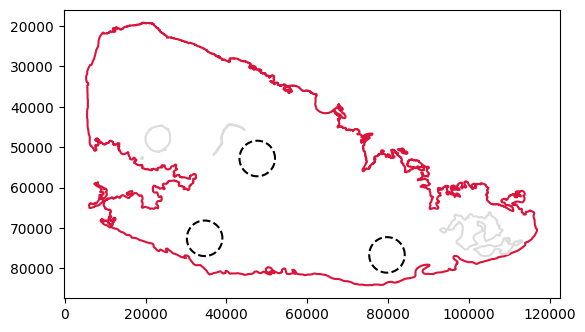

In [25]:
plot_cores(tum_cores, tum)

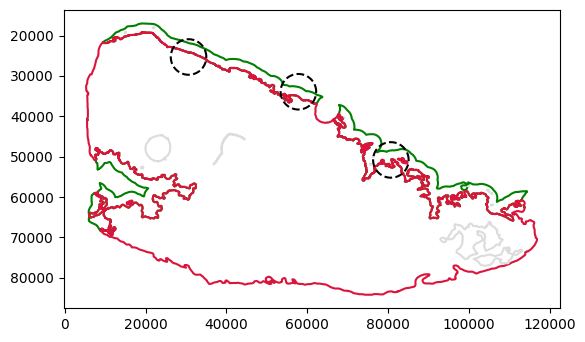

In [26]:
plot_cores(im_cores, tum, im)

#### Intraclass Correlation Coefficient

In [5]:
samples = []
tum_dens = []
im_dens = []
for sampleid in sampleids:
    spatdat = SpatDat(sampleid, parent_filepath)
    tum_den = (len(spatdat.subset_cells("tumour")) / (spatdat.subset_annotation("tumour").area * mm2_per_pixels2))
    im_den = (len(spatdat.subset_cells("IM")) / (spatdat.subset_annotation("IM").area * mm2_per_pixels2))
    samples.append(sampleid)
    tum_dens.append(tum_den)
    im_dens.append(im_den)

den = pd.DataFrame({"Sampleid": samples, "tum_den": tum_dens, "im_den": im_dens})

In [6]:
den

,Sampleid,tum_den,im_den
0,01_F,804.022884,815.782184
1,01_G,225.027071,212.653527
2,02_G,1049.946522,941.210820
3,02_H,431.779689,416.352022
4,03_B,33.618035,162.369037
5,03_H,91.502656,321.243087
6,04_I,346.394474,480.472781
7,04_N,363.616220,546.144162
8,05_G,379.291157,802.300236
9,05_I,423.454086,847.909409


In [24]:
tma = sim_data[["Sampleid", "Region", "Density_n_mean"]]

tma_im = tma[tma["Region"] == "IM"].reset_index(drop=True)
tma_tum = tma[tma["Region"] == "tumour"].reset_index(drop=True)

# den = den.rename(columns={"sampleid": "Sampleid"})

icc_table_im = tma_im.merge(den, on="Sampleid", how="left")
icc_table_tum = tma_tum.merge(den, on="Sampleid", how="left")

icc_table_im = icc_table_im[~icc_table_im["Density_n_mean"].isna()]
icc_table_tum = icc_table_tum[~icc_table_tum["Density_n_mean"].isna()]

In [25]:
icc_table_tum_long = icc_table_tum.melt(
    id_vars="Sampleid",
    value_vars=["Density_n_mean", "tum_den"],
    var_name="raters",
    value_name="ratings"
)

icc_table_im_long = icc_table_im.melt(
    id_vars="Sampleid",
    value_vars=["Density_n_mean", "tum_den"],
    var_name="raters",
    value_name="ratings"
)

In [26]:
icc_table_tum_long

,Sampleid,raters,ratings
0,01_F,Density_n_mean,587.968742
1,01_G,Density_n_mean,375.402162
2,02_G,Density_n_mean,1202.297157
3,02_H,Density_n_mean,230.826975
4,03_B,Density_n_mean,115.207468
...,...,...,...
65,26_I,tum_den,265.230197
66,27_H,tum_den,706.907380
67,28_FSC,tum_den,127.185324
68,29_L,tum_den,116.881187


In [29]:
icc_res_tum = pg.intraclass_corr(icc_table_tum_long, targets="Sampleid", ratings="ratings", raters="raters")
icc_res_tum

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.744210,6.818916,34,35,7.095328e-08,"[0.55, 0.86]"
1,ICC2,Single random raters,0.744480,6.875724,34,34,8.822848e-08,"[0.55, 0.86]"
2,ICC3,Single fixed raters,0.746055,6.875724,34,34,8.822848e-08,"[0.55, 0.86]"
3,ICC1k,Average raters absolute,0.853349,6.818916,34,35,7.095328e-08,"[0.71, 0.93]"
4,ICC2k,Average random raters,0.853527,6.875724,34,34,8.822848e-08,"[0.71, 0.93]"
5,ICC3k,Average fixed raters,0.854561,6.875724,34,34,8.822848e-08,"[0.71, 0.93]"


In [30]:
icc_res_im = pg.intraclass_corr(icc_table_im_long, targets="Sampleid", ratings="ratings", raters="raters")
icc_res_im

,Type,Description,ICC,F,df1,df2,pval,CI95%
0,ICC1,Single raters absolute,0.494782,2.958684,30,31,0.001791,"[0.18, 0.72]"
1,ICC2,Single random raters,0.517955,3.654076,30,30,0.000328,"[0.19, 0.74]"
2,ICC3,Single fixed raters,0.570269,3.654076,30,30,0.000328,"[0.28, 0.77]"
3,ICC1k,Average raters absolute,0.662012,2.958684,30,31,0.001791,"[0.3, 0.84]"
4,ICC2k,Average random raters,0.682438,3.654076,30,30,0.000328,"[0.32, 0.85]"
5,ICC3k,Average fixed raters,0.726333,3.654076,30,30,0.000328,"[0.43, 0.87]"


### Single Sample Test

In [3]:
spatdat = SpatDat(sampleid="13_G", parent_filepath=parent_filepath)

In [4]:
cells = spatdat.subset_cells("extended_partition")
tum = spatdat.subset_annotation("tumour")
ext_partition = spatdat.subset_annotation("extended_partition")
im = spatdat.subset_annotation("IM")
outer_im = spatdat.subset_annotation("outer_IM")

In [6]:
sample_n_cores("13_G", cells, tum, region="IM", secondary_anno=im, outer_im_anno=outer_im, core_radius=0.5, n_cores=10, extended_partition=ext_partition)

{'Density_n_mean': 212.76433846359083,
 'Den_stdev': 119.06050144587343,
 'Den_sterr': 39.686833815291145,
 'Region': 'IM',
 'Sampleid': '13_G',
 'Radius': 2201.188641866608,
 'n_cores': 10,
 'Cores_actually_sampled': 9,
 'Counts_n_mean': 144.77777777777777,
 'Areas_n_mean': 0.6989862936045439,
 'Density_top_core': 405.6898316475258,
 'Density_bottom_core': 24.23045593877351}